# Gépi tanulás féléves feladat - Dézsi Csaba István - bdigne
## Kezdjük az adatok elemzésével, illetve, ha szükséges, az adathalmaz tisztításával

In [57]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
#DATA CLEANING
#getting rid of not needed columns
ignData = pd.read_csv("ign.csv")

ignData = ignData.drop('Unnamed: 0', axis=1)
ignData = ignData.drop('url', axis=1)
ignData = ignData.drop('editors_choice', axis=1)

ignData


,score_phrase,title,platform,score,genre,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,2012,9,12
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,2012,9,12
3,Great,NHL 13,Xbox 360,8.5,Sports,2012,9,11
4,Great,NHL 13,PlayStation 3,8.5,Sports,2012,9,11
...,...,...,...,...,...,...,...,...
18620,Good,Tokyo Mirage Sessions #FE,Wii U,7.6,RPG,2016,6,29
18621,Amazing,LEGO Star Wars: The Force Awakens,PlayStation 4,9.0,"Action, Adventure",2016,6,29
18622,Mediocre,Star Ocean: Integrity and Faithlessness,PlayStation 4,5.8,RPG,2016,6,28
18623,Masterpiece,Inside,Xbox One,10.0,Adventure,2016,6,28


>>> adattípusok(dtypes):  [dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')]
>>> hiányzó adatok százaléka:  [0.0, 0.0, 0.0, 0.0, 0.19328859060402684, 0.0, 0.0, 0.0]


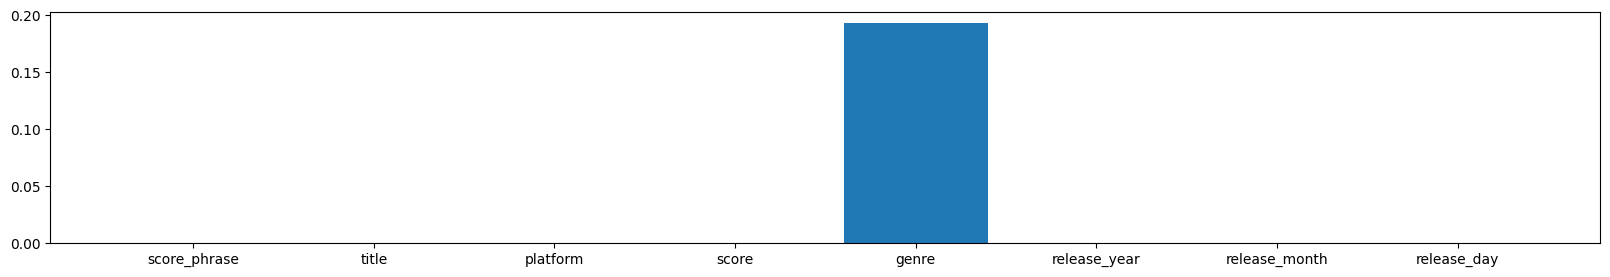

>>> látszik, hogy a genre-ban az adatok közel 20%-a NA, vagy numpy.NaN
>>> oszlop ahol több mint 0%, de kevesebb mint 40% a hiányzó értékünk:  ['genre']
>>> Látszik azért lett kidobva adatunk, de szerencsére nem sok:
	- Első futtatáskor az adathalmaz mérete: 18625 rows × 8 columns
	- Tisztítást követő méret: 18589 rows × 8 columns


,score_phrase,title,platform,score,genre,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Platformer,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,PlayStation Vita,9.0,Platformer,2012,9,12
2,Great,Splice: Tree of Life,iPad,8.5,Puzzle,2012,9,12
3,Great,NHL 13,Xbox 360,8.5,Sports,2012,9,11
4,Great,NHL 13,PlayStation 3,8.5,Sports,2012,9,11
...,...,...,...,...,...,...,...,...
18620,Good,Tokyo Mirage Sessions #FE,Wii U,7.6,RPG,2016,6,29
18621,Amazing,LEGO Star Wars: The Force Awakens,PlayStation 4,9.0,"Action, Adventure",2016,6,29
18622,Mediocre,Star Ocean: Integrity and Faithlessness,PlayStation 4,5.8,RPG,2016,6,28
18623,Masterpiece,Inside,Xbox One,10.0,Adventure,2016,6,28


In [59]:
#adat típusok és hiányzó adatok ellenőrzése, elemzése, esetleges kezelése

dtypes = list()
for dtype in ignData.dtypes:
    dtypes.append(dtype)

print('>>> adattípusok(dtypes): ', dtypes)
#------------------------------------------

ign_values_list = list()
cols_list = list()
for col in ignData.columns:
    pct_missing = np.mean(ignData[col].isnull())*100
    cols_list.append(col)
    ign_values_list.append(pct_missing)
print('>>> hiányzó adatok százaléka: ', ign_values_list)
#------------------------------------------


pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = ign_values_list

plt.figure(figsize=(20, 3))
plt.bar(pct_missing_df['col'], pct_missing_df['pct_missing'])
plt.show()
print('>>> látszik, hogy a genre-ban az adatok közel 20%-a NA, vagy numpy.NaN')
#------------------------------------------

less_missing_values_cols_list = list(pct_missing_df.loc[(pct_missing_df.pct_missing < 0.4) & (pct_missing_df.pct_missing > 0), 'col'].values)
ignData.dropna(subset=less_missing_values_cols_list, inplace=True)

print('>>> oszlop ahol több mint 0%, de kevesebb mint 40% a hiányzó értékünk: ', less_missing_values_cols_list)

print('>>> Látszik azért lett kidobva adatunk, de szerencsére nem sok:')
print('\t- Első futtatáskor az adathalmaz mérete: 18625 rows × 8 columns')
print('\t- Tisztítást követő méret: 18589 rows × 8 columns')
ignData

## Most, hogy megvan az adattisztítás kezdjül el felépíteni a train és teszt adatainkat

In [74]:
from sklearn.model_selection import train_test_split
import torch

In [78]:
#a biztonság kedvéért inkább copy-zok, nehogy elcsesszek valamit, mert akkor futtathatjuk úrja az elejétől
copiedData = ignData.copy()

#első körben szétválasztjuk a be és kimeneti adatainkat, majd ezeket sétszedjük a megszokott módon train és teszt adathalmazokba
X, y = copiedData.drop('score', axis=1), copiedData['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=True)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

y_train, y_test

ValueError: could not determine the shape of object type 'DataFrame'

In [62]:
X_train

,score_phrase,title,platform,genre,release_year,release_month,release_day
8747,Amazing,Gunstar Heroes,Genesis,Action,2006,12,11
13577,Okay,Cloudy with a Chance of Meatballs,PlayStation 3,Action,2009,10,2
2279,Awful,Transformers: Beast Wars Transmetals,PlayStation,Fighting,2000,6,26
6570,Okay,Constantine,PlayStation 2,Action,2005,2,16
5187,Great,Star Wars Rogue Squadron III: Rebel Strike,GameCube,Shooter,2003,10,20
...,...,...,...,...,...,...,...
12925,Okay,Puzzle Kingdoms,Nintendo DS,Puzzle,2009,5,19
15711,Mediocre,SpongeBob SquigglePants,Wii,Action,2011,4,15
4291,Great,Tiger Woods PGA Tour 2003,GameCube,Sports,2002,10,24
2703,Okay,Chicken Run,Game Boy Color,Action,2000,11,10


In [63]:
X_test

,score_phrase,title,platform,genre,release_year,release_month,release_day
19,Good,JoJo's Bizarre Adventure HD,Xbox 360,Fighting,2012,9,3
1188,Amazing,Triple Play 2000,PlayStation,Sports,1999,3,24
7864,Mediocre,Crime Stories,PC,Adventure,2006,4,10
18290,Mediocre,Just Cause 3,PlayStation 4,Action,2015,12,4
1410,Good,Fighting Steel,PC,Strategy,1999,7,13
...,...,...,...,...,...,...,...
17166,Okay,Guncraft,PC,Shooter,2013,8,27
6307,Bad,Fight Club,Xbox,Fighting,2004,11,15
2810,Okay,Blair Witch Volume 3: The Elly Kedward Tale,PC,Action,2000,11,28
16205,Okay,Simply Minesweeper,Nintendo DSi,Board,2011,10,6


## Kezdjük el a modellek definiálását és feltanítását

In [64]:
import torch.nn as nn

# Define the model
model = nn.Sequential(
    nn.Linear(7, 24),
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

In [65]:
import torch.nn as nn
import torch.optim as optim
 
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
opt = optim.Adam(model.parameters(), lr=0.0001)

In [67]:
import tqdm
import copy
import torch

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

epochs = 30
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start : start+batch_size]
            y_batch = y_train[start : start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            opt.zero_grad()
            loss.backward()
            # update weights
            opt.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

ValueError: could not determine the shape of object type 'Series'